<a href="https://colab.research.google.com/github/Devansh-react/PyTorch_fundamentals/blob/main/Ch_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autograd: core component of pytorch that provide automatic differentations for tensor operation , gradient comoutatuions in machine learning

In [55]:
import torch

Eg-01

In [30]:
x = torch.tensor(3.0,requires_grad=True)
x

tensor(3., requires_grad=True)

In [31]:
y=x**2
y

tensor(9., grad_fn=<PowBackward0>)

In [32]:
z = torch.sin(y)
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [33]:
z.backward()

In [34]:
x.grad

tensor(-5.4668)

y.grad cannot be accessed as y isthe intermediate node , on intermediate node gradeinnt cannot be calculated
---
input tensor (x)-> leaf node
pitput tensor (z)-> root node

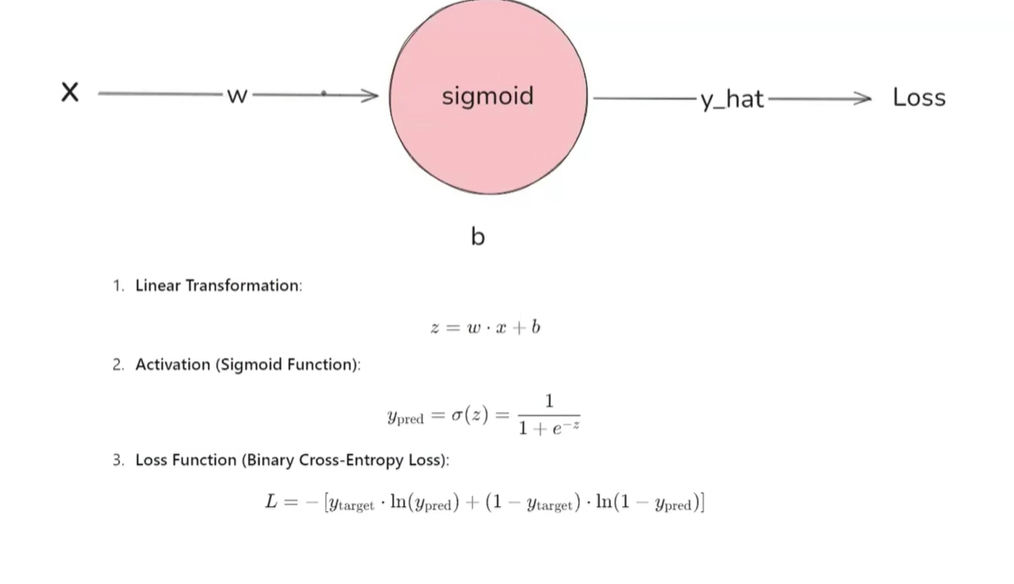

In [36]:
x = torch.tensor(6.9)
y = torch.tensor(0.0)


In [37]:
w= torch.tensor(1.0,requires_grad=True)
b = torch.tensor(0.01,requires_grad=True)
w,b

(tensor(1., requires_grad=True), tensor(0.0100, requires_grad=True))

In [40]:
z = w*x+b
y_pred = torch.sigmoid(z)
y_pred,z

(tensor(0.9990, grad_fn=<SigmoidBackward0>),
 tensor(6.9100, grad_fn=<AddBackward0>))

In [45]:
loss = torch.binary_cross_entropy_with_logits(y_pred,y)
loss

tensor(1.3125, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [46]:
loss.backward()

In [47]:
w.grad,b.grad

(tensor(0.0050), tensor(0.0007))

In [51]:
x = torch.tensor([2.0,4.0,7.5],requires_grad=True)
y = (x**2).mean()
x,y

(tensor([2.0000, 4.0000, 7.5000], requires_grad=True),
 tensor(25.4167, grad_fn=<MeanBackward0>))

In [52]:
y.backward()

In [54]:
x.grad

tensor([1.3333, 2.6667, 5.0000])

Gradients accumulate by default across multiple forward and backward passes. They are not automatically reset and must be cleared manually to prevent unintended accumulation."

In [56]:
x.grad.zero_()

tensor([0., 0., 0.])

In [ ]:
# option:1
x.requires_grad_(False)
# option:2
z = x.detach()
option:3
with torch.no_grad():
  y = x**2
# y.backward()-> will not work